In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
visa_df=pd.read_csv(r"C:\Users\kolli\Documents\Naresh IT\data files\\Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**Box plot**

- box plot is used for to detect outliers

- box plot has min, q1, q2 ,q3 and max value

- inside box plot red line represents median which is 50 percentile of data

**Outlier**

- very very huge observation

- very very small observation

- which pull the data in anyside of the distribution

    - q1-1.5*IQR and q3+1.5*IQR

- Strong outliers

    - q1-3*IQR and q3+3*IQR

- IQR: inter quartile range

    - IQR=Q3-Q1
      
- q1:25p

- q2:50p

- q3:75p

          Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
              
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR


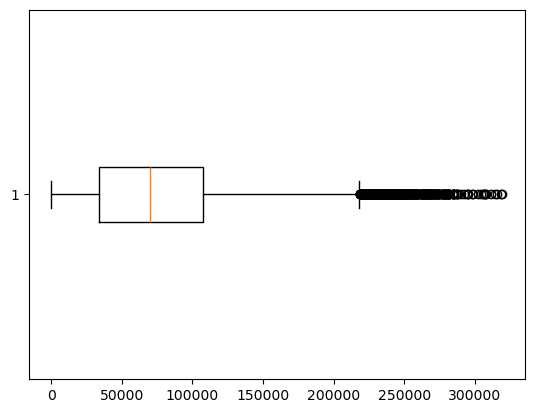

In [4]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

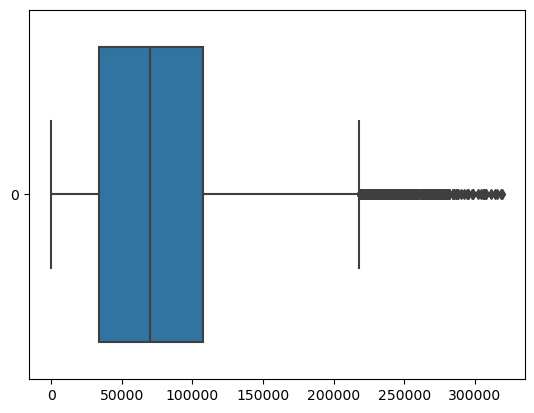

In [5]:
sns.boxplot(visa_df['prevailing_wage'],orient='h')
plt.show()

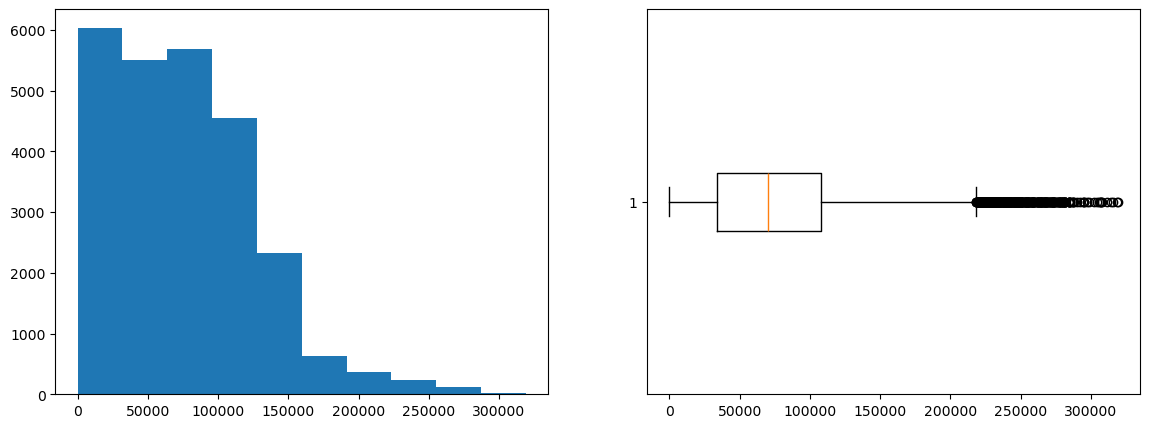

In [6]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

**Finding the outliers**

- outliers are avaliable less than q1-1.5*IQR

- outliers are avaliable greater than q3+1.5IQR

- step:1

    - calculate Q1:25p

    - calculate Q3: 75p

    - calculate IQR:Q3-Q1
 
- step-2:

      - LB=Q1-1.5*IQR

      - UB=Q3+1.5*IQR

- step-3:

    - con1=visa_df['prevailing_wage']<LB

    - con2=visa_df['prevailing_wage']>UB

    - apply OR operator and get the outliers data

**Outliers data**

In [7]:
Q1=np.percentile(visa_df['prevailing_wage'],25)

In [8]:
Q3=np.percentile(visa_df['prevailing_wage'],75)

In [9]:
IQR=Q3-Q1

In [10]:
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR

In [11]:
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
outliers_data=visa_df[con1|con2]
len(outliers_data)

427

**Non outliers data**

In [12]:
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q3=np.percentile(visa_df['prevailing_wage'],75)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
con1=visa_df['prevailing_wage']>LB
con2=visa_df['prevailing_wage']<UB
non_outliers_data=visa_df[con1&con2]
len(non_outliers_data)

25053

**Histogram and boxplot for non outliers data**

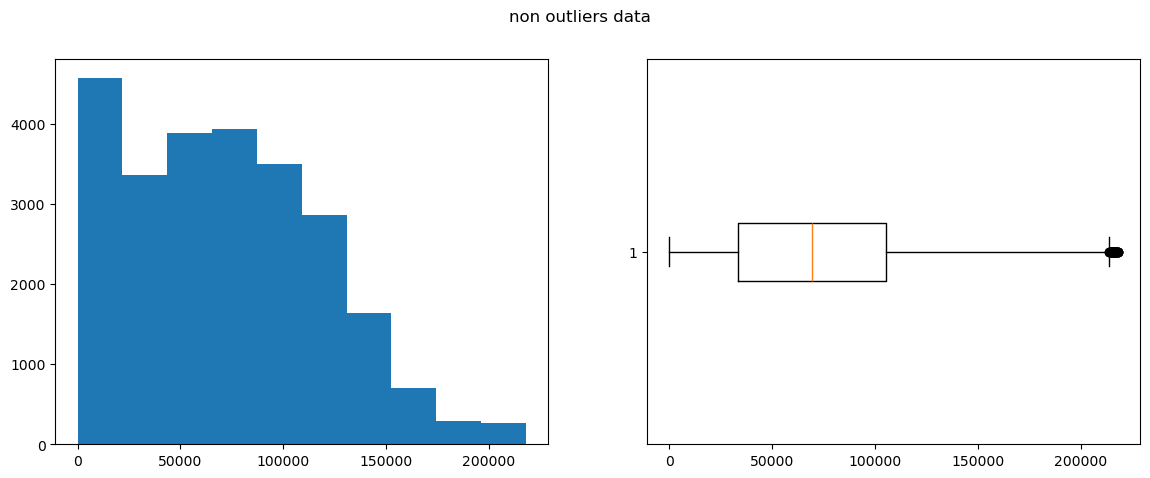

In [13]:
plt.figure(figsize=(14,5))
plt.suptitle("non outliers data")
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'],vert=False)
plt.show()

**Comparing total with non outliers data**

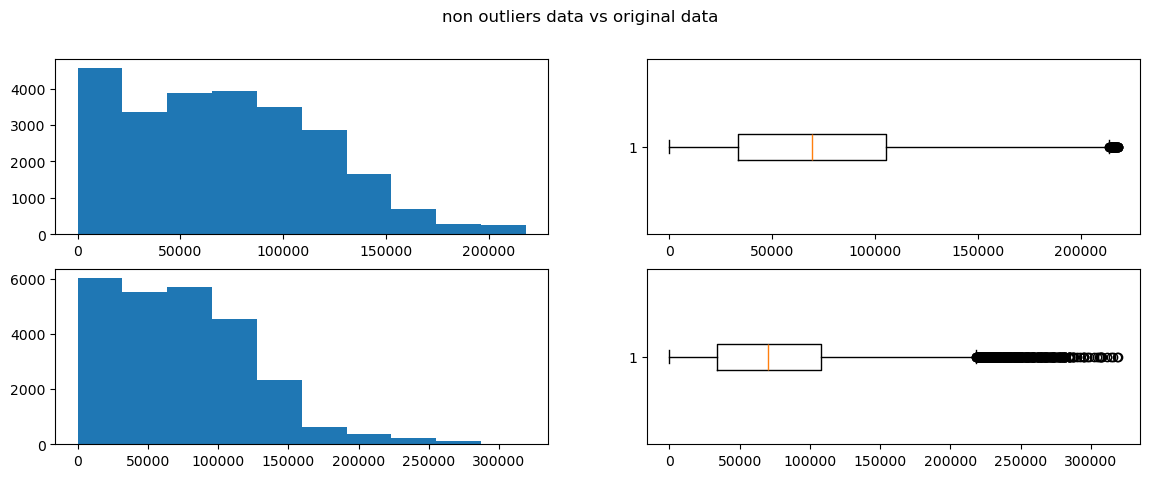

In [14]:
plt.figure(figsize=(14,5))
plt.suptitle("non outliers data vs original data")
plt.subplot(2,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(2,2,2).boxplot(non_outliers_data['prevailing_wage'],vert=False)

plt.subplot(2,2,3).hist(visa_df['prevailing_wage'])
plt.subplot(2,2,4).boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

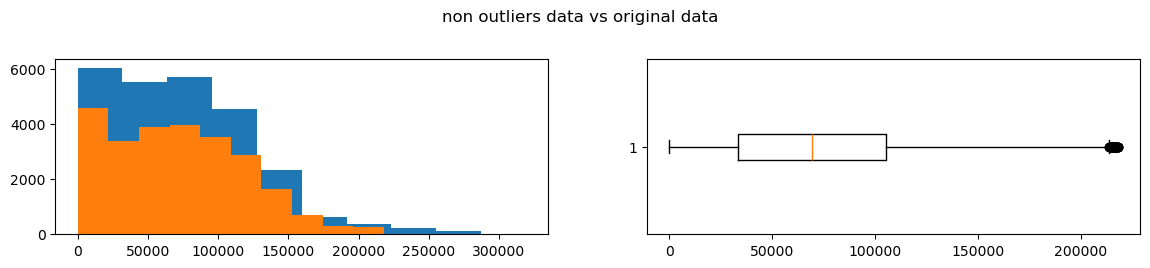

In [15]:
plt.figure(figsize=(14,5))
plt.suptitle("non outliers data vs original data")
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(2,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(2,2,2).boxplot(non_outliers_data['prevailing_wage'],vert=False)
plt.show()

**How to deal the outliers**

**Method-1: drop the outliers**

    - Drop the outliers is not a good idea
    - when you drop the outliers, data will lose
    - for example here we are droping 427 rows
    - x% of 25480=427
    - it is 1.75data, here it is fine we can drop the outlier

**Method-2:fill with median value**

    - we already know that outliers doesn't affect the median
    - so we can fill outliers by median

**Method-3: cap the values with Q1 and Q3**

    - all less than lower bound values we can replace with q1 or LB(lower bound)
    - all greater than upper bound values we can replace with q3 or UB(upper bound)

**fill with median**

- craete a empty list

- calculate median value: visa_df['prevailing_wage'].median

- iterate through visa_df['prevailing_wage'].values

- if each value i,e i,ub then append with median values

- else append with i value

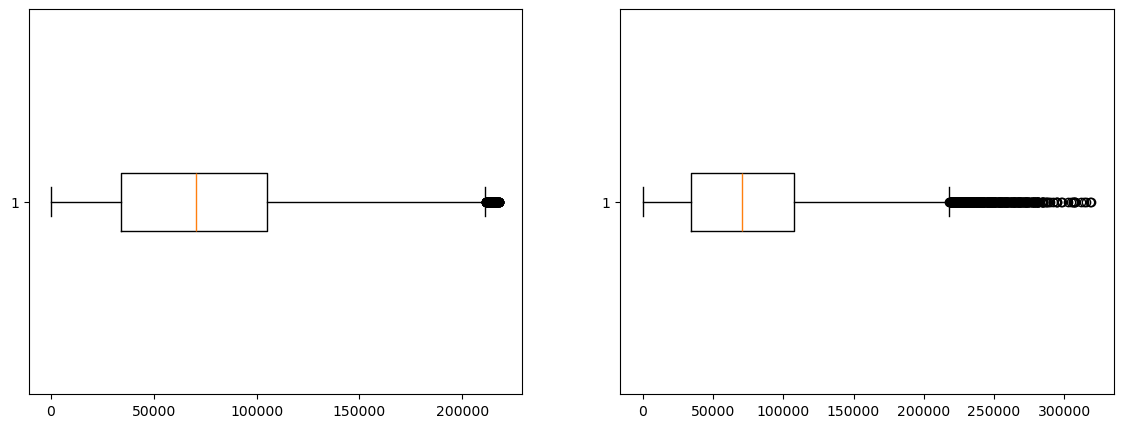

In [5]:
l=[]
plt.figure(figsize=(14,5))
median=visa_df['prevailing_wage'].median()
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q3=np.percentile(visa_df['prevailing_wage'],75)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
for value in visa_df['prevailing_wage'].values:
    if value<LB or value>UB:
        l.append(median)
    else:
        l.append(value)

visa_df_copy=visa_df.copy()
visa_df_copy['prevailing_wage']=l
plt.subplot(1,2,1).boxplot(visa_df_copy['prevailing_wage'],vert=False)
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

**np.where**

- np.where will use for binary condition

- it has 3 arguments

    - condition

    - value if condition is true

    - value if condition is false

In [17]:
d={"sub":['DS','ML','CS'], "Marks":[100,120,20]}
data=pd.DataFrame(d)

#marks column replace with 1n when value >100
#else same value

In [18]:
con=data['Marks']>100
l=np.where(con,1,data['Marks'])
#if condition true then replace with:1
#if condition false then replce with:data['Marks']
l

array([100,   1,  20], dtype=int64)

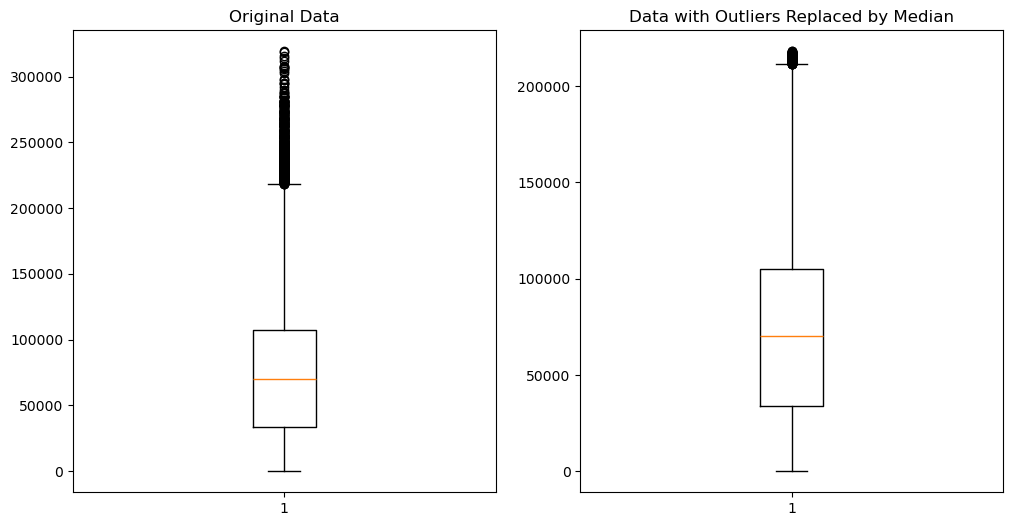

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# Conditions for outliers
con1 = visa_df['prevailing_wage'] < LB
con2 = visa_df['prevailing_wage'] > UB
con = con1 | con2

# Calculate the median
median = visa_df['prevailing_wage'].median()

# Replace outliers with the median
new_data = np.where(con, median, visa_df['prevailing_wage'])

# Ensure visa_df_copy is a copy of visa_df
visa_df_copy = visa_df.copy()
visa_df_copy['prevailing_wage'] = new_data

# Plot the boxplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(visa_df['prevailing_wage'])
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.boxplot(new_data)
plt.title('Data with Outliers Replaced by Median')

plt.show()


In [8]:
np.where(con, median, visa_df['prevailing_wage'])
con

0        False
1        False
2        False
3        False
4        False
         ...  
25475    False
25476     True
25477    False
25478    False
25479    False
Name: prevailing_wage, Length: 25480, dtype: bool

In [9]:
np.where(con, median, visa_df['prevailing_wage'])

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])